# 局部二值模式

### Local Binary Pattern,LBP是一种有效的描述图像局部纹理特征的方法，用于纹理特征提取，经过其改善，具备了旋转不变性和灰度不变性。

### 在3x3的窗口内，以窗口中心像素为阈值，将相邻的8个像素的灰度值与其进行比较，若周围像素值大于中心像素值，则该像素点的位置被标记为1，否则为0。这样，3x3邻域内的8个点经比较可产生8位二进制数（通常转换为十进制数即LBP码，共256种），即得到该窗口中心像素点的LBP值，并用这个值来反映该区域的纹理信息
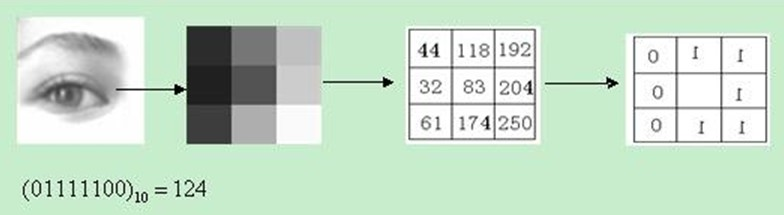

### 传统LBP算法只覆盖了一个固定半径范围内的小区域，为了适应不同尺度的纹理特征，并达到灰度和旋转不变性的要求，将 3×3邻域扩展到任意邻域，并用圆形邻域代替了正方形邻域，改进后的 LBP 算子允许在半径为 R 的圆形邻域内有任意多个像素点。得到了诸如半径为R的圆形区域内含有P个采样点的LBP算子。
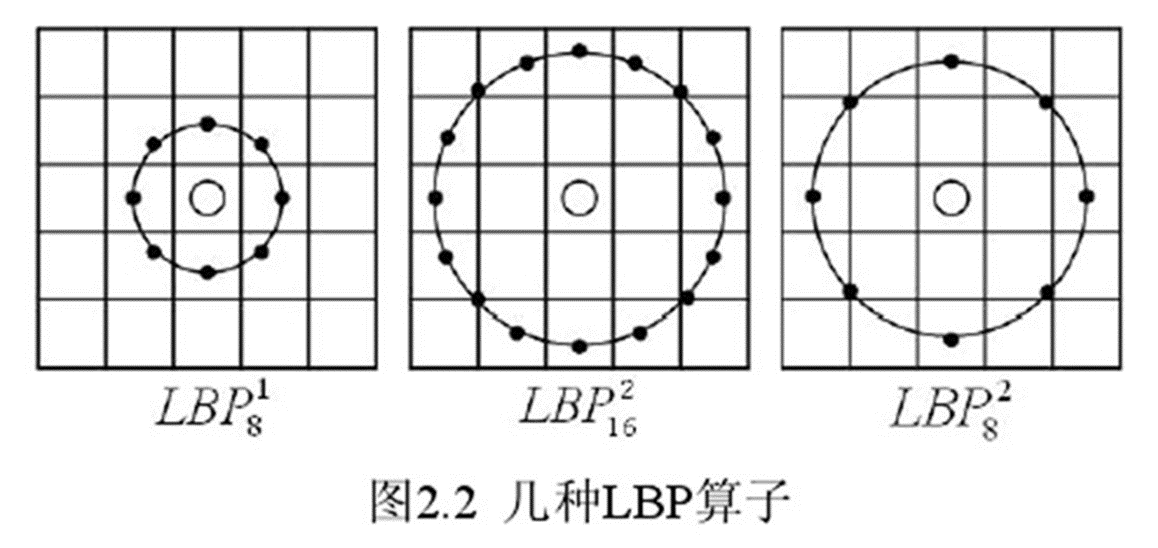

### 降维（等价模式）
### 当采样点数为P时，那么LBP将产生2的P次方种LBP值，所以如此多的二值模式对计算机内存十分不友好，同时对于纹理的表达也是不的。因此需要对原始的LBP模式（这里的模式，就是LBP值）进行降维。
### “等价模式”定义为：当某个LBP所对应的循环二进制数从0到1或从1到0最多有两次跳变时，该LBP所对应的二进制就称为一个等价模式类。这里所说的两次跳变，可以将LBP看成一个循环数字串。

#### 算法步骤

#### 1.首先将检测图片划分为小区域（cell）；
#### 2.对于每个cell中的一个像素，将相邻的8个像素的灰度值与其进行比较，若周围像素值大于中心像素值，则该像素点的位置被标记为1，否则为0。这样，3*3邻域内的8个点经比较可产生8位二进制数，即得到该窗口中心像素点的LBP值；
#### 3.然后计算每个cell的直方图，即每个数字（假定是十进制数LBP值）出现的频率；然后对该直方图进行归一化处理。
#### 4.最后将得到的每个cell的统计直方图进行连接成为一个特征向量，也就是整幅图的LBP纹理特征向量；
#### 5.然后便可利用分类算法进行图片分类

In [4]:
import cv2   
import numpy as np   
from matplotlib import pyplot as plt

(<matplotlib.image.AxesImage at 0x18cfd89cc18>, Text(0.5, 1.0, 'Original'))

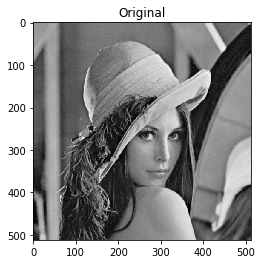

In [5]:
# 加载原图
img_gray = cv2.imread('lena_Gray.tif',cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray'),plt.title('Original')

In [14]:
# 调用函数实现lbp
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data, io,data_dir,filters, feature
from skimage.color import label2rgb

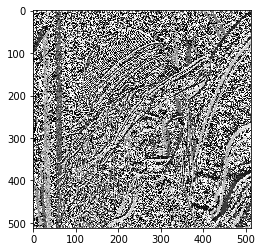

In [12]:
# settings for LBP
radius = 1  # LBP算法中范围半径的取值
n_points = 8 * radius # 领域像素点数

img_lbp = local_binary_pattern(img_gray, n_points, radius)
plt.imshow(img_lbp, plt.cm.gray)